# **Data Cleaning and Preparation for Bitcoin (BTC/USD) Trading Data**  

## **Introduction**  
In this notebook, we will analyze and clean Bitcoin (BTC/USD) trading data. This dataset contains key trading information, including opening, closing, high, and low prices over a given period.  

The goal is to ensure data quality before any analysis or modeling by applying appropriate cleaning and transformation techniques.  

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [2]:
data=pd.read_csv("crypto_data.csv")

In [3]:
data.head()

,symbol,t,o,h,l,c,v,vw,n
0,BTC/USD,2024-08-01T00:00:00Z,64588.350,64813.4175,64357.745000,64640.4450,1.140908,64526.581753,11
1,BTC/USD,2024-08-01T01:00:00Z,64606.725,64788.4850,64094.840000,64193.8700,0.032612,64575.553126,4
2,BTC/USD,2024-08-01T02:00:00Z,64146.834,64226.9500,63860.490000,64091.9340,0.090788,64048.468919,9
3,BTC/USD,2024-08-01T03:00:00Z,64058.810,64096.8950,63750.000000,63919.9875,0.012476,63996.530554,6
4,BTC/USD,2024-08-01T04:00:00Z,63888.650,64016.3950,63638.964392,63675.1270,0.037103,63850.300155,6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9218 entries, 0 to 9217
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  9218 non-null   object 
 1   t       9218 non-null   object 
 2   o       9218 non-null   float64
 3   h       9218 non-null   float64
 4   l       9218 non-null   float64
 5   c       9218 non-null   float64
 6   v       9218 non-null   float64
 7   vw      9218 non-null   float64
 8   n       9218 non-null   int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 648.3+ KB


## **Dataset Overview**  
The dataset consists of **9,218 records** and **9 columns**, representing various Bitcoin/USD trading metrics:  

- **symbol**: Trading pair symbol (BTC/USD).  
- **t**: Trade timestamp (ISO format).  
- **o (open)**: Opening price.  
- **h (high)**: Highest price reached.  
- **l (low)**: Lowest price recorded.  
- **c (close)**: Closing price.  
- **v (volume)**: Trading volume.  
- **vw (volume-weighted average price)**: Volume-weighted average price.  
- **n**: Number of transactions executed.  

In [5]:
# Afficher des statistiques descriptives
data.describe()

,o,h,l,c,v,vw,n
count,9218.000000,9218.000000,9218.000000,9218.000000,9218.000000,9218.000000,9218.000000
mean,41117.176681,41270.810856,40961.901973,41119.310317,0.969169,39193.963534,8.350184
std,40238.759046,40388.488279,40089.259192,40241.264144,3.931299,40750.918511,21.127489
min,2169.680000,2218.307000,2122.115000,2168.631500,0.000000,0.000000,0.000000
25%,2751.059375,2764.867125,2737.514500,2751.695000,0.003006,2640.899341,1.000000
50%,26933.485750,27835.754500,26570.370000,26948.943000,0.038523,3847.824421,3.000000
75%,72273.881375,72451.631500,72130.431250,72290.642750,0.367117,71770.549985,8.000000
max,108249.820000,109379.685000,107781.503000,108287.880000,118.300833,108310.935248,535.000000



## **1. Convert Timestamp to Datetime Format**  
To facilitate time-based analysis, we convert the `t` column into a proper datetime format.  

In [6]:
data['t'] = pd.to_datetime(data['t'])

## **2. Check for Missing Values**  


In [7]:
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 symbol    0
t         0
o         0
h         0
l         0
c         0
v         0
vw        0
n         0
dtype: int64


In [20]:
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)

## **3. Detecting Outliers with Boxplots**  

To identify potential outliers in our dataset, we use **boxplots** for numerical columns. Boxplots help visualize the distribution of each feature and detect extreme values that might need further investigation.  

The following visualization displays boxplots for key trading metrics such as **open, high, low, close prices, volume-weighted average price, number of transactions, and volume**.  

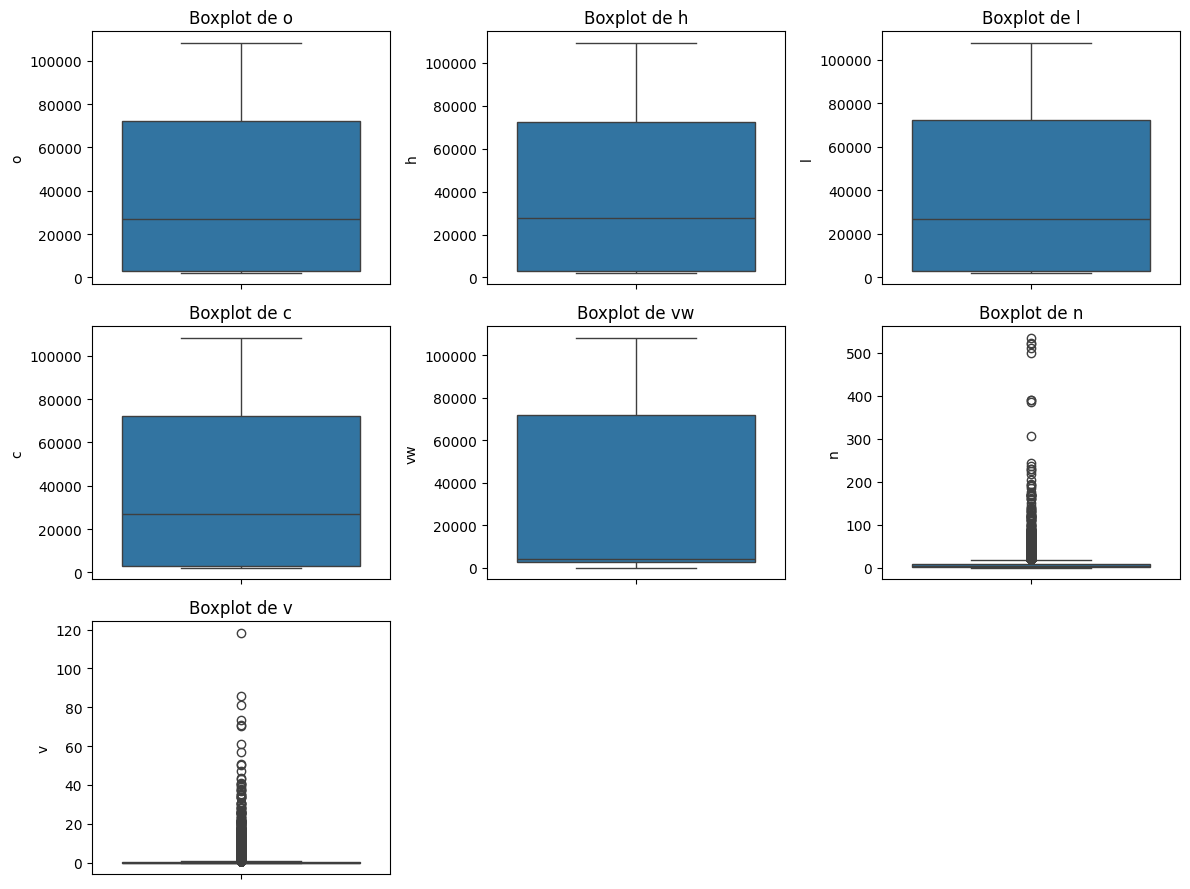

In [9]:
num_columns = ['o', 'h', 'l', 'c', 'vw', 'n', 'v']

plt.figure(figsize=(12, 9))
for i, column in enumerate(num_columns, 1):
    plt.subplot(3, 3, i)  # Correction : Utilisation d'une grille 3x3
    sns.boxplot(y=data[column])
    plt.title(f"Boxplot de {column}")

plt.tight_layout()
plt.show()

## **3. Handling Outliers Using the IQR Method**  


In [21]:
for column in num_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remplacement des outliers par la médiane
    median_value = data[column].median()
    data[column] = data[column].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

## **4. Normalizing the 'n' Column with Log Transformation**  

In [11]:
data['n'] = np.log1p(data['n'])# log(1 + n) pour éviter log(0)

## **5. Verifying Outlier Correction with Boxplots**  


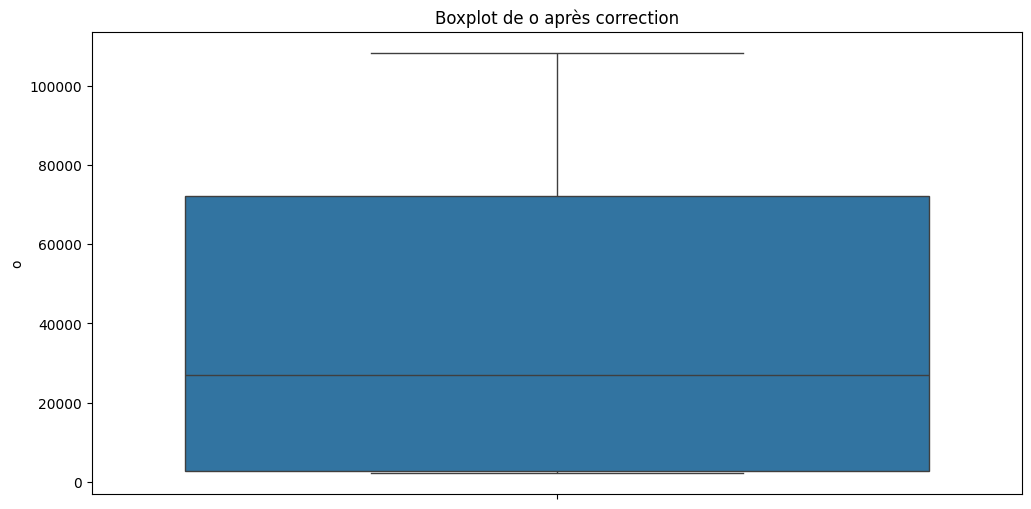

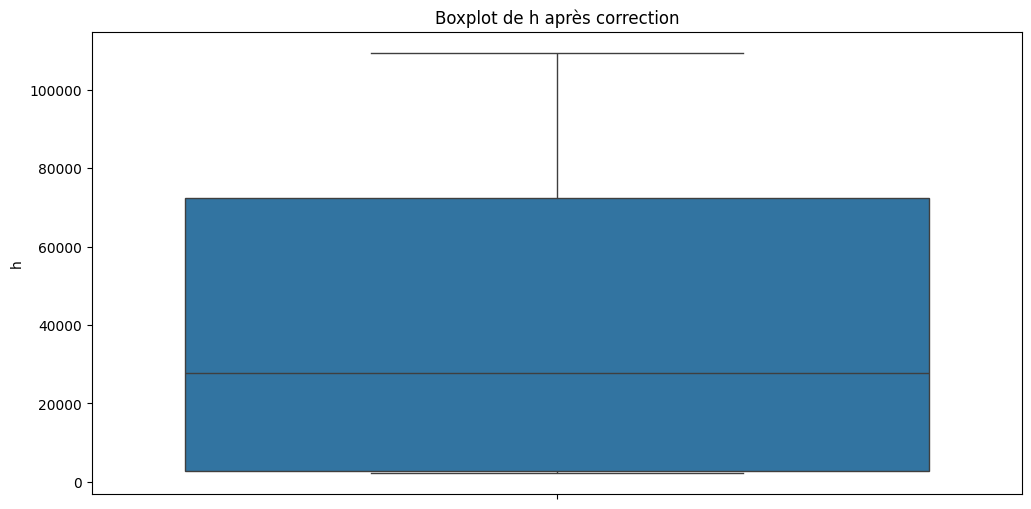

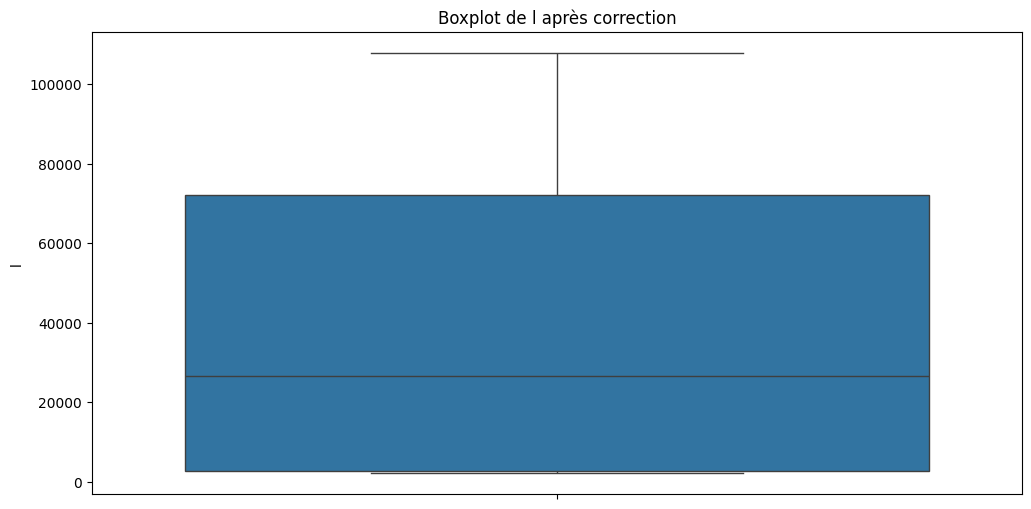

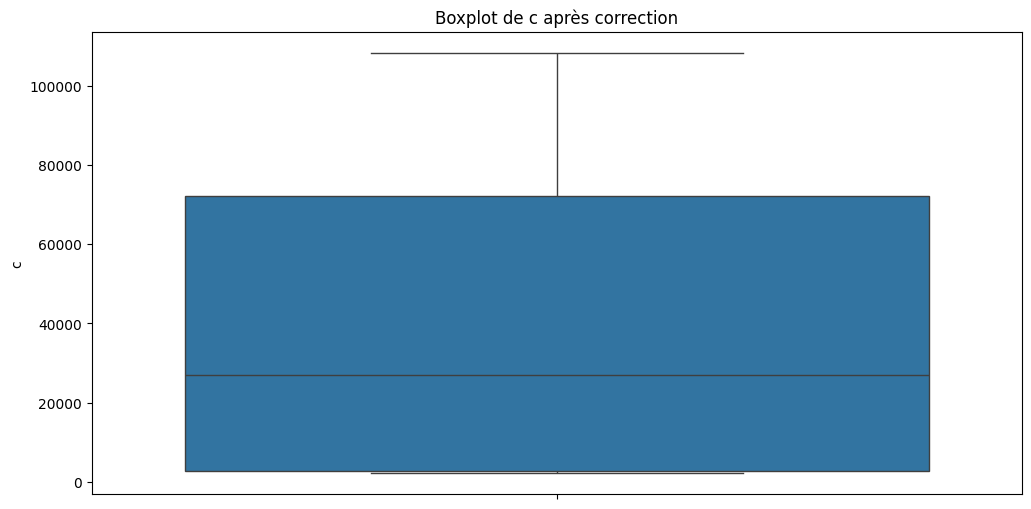

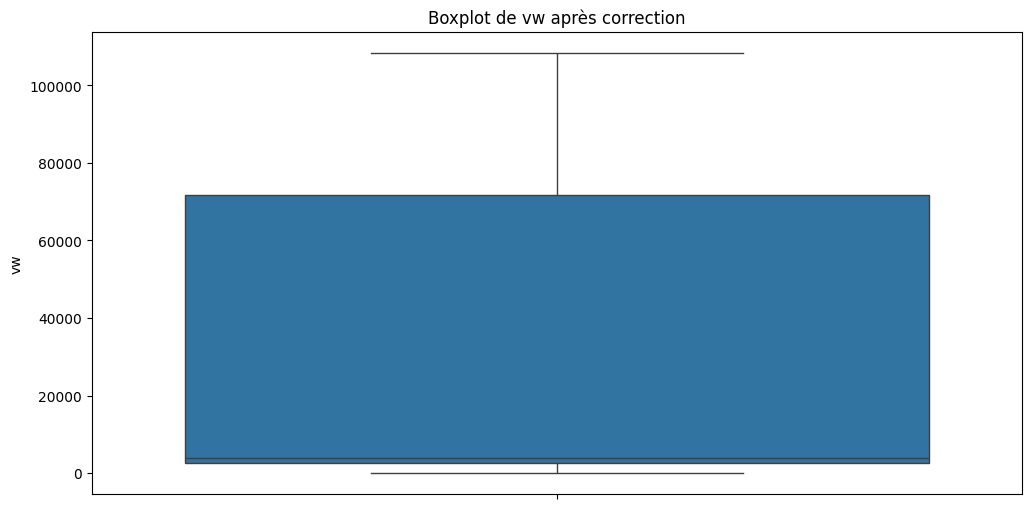

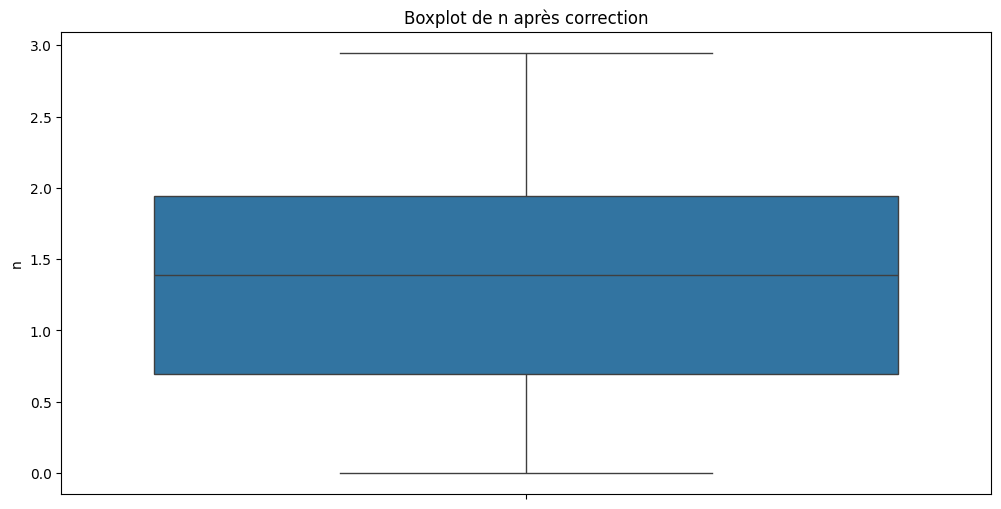

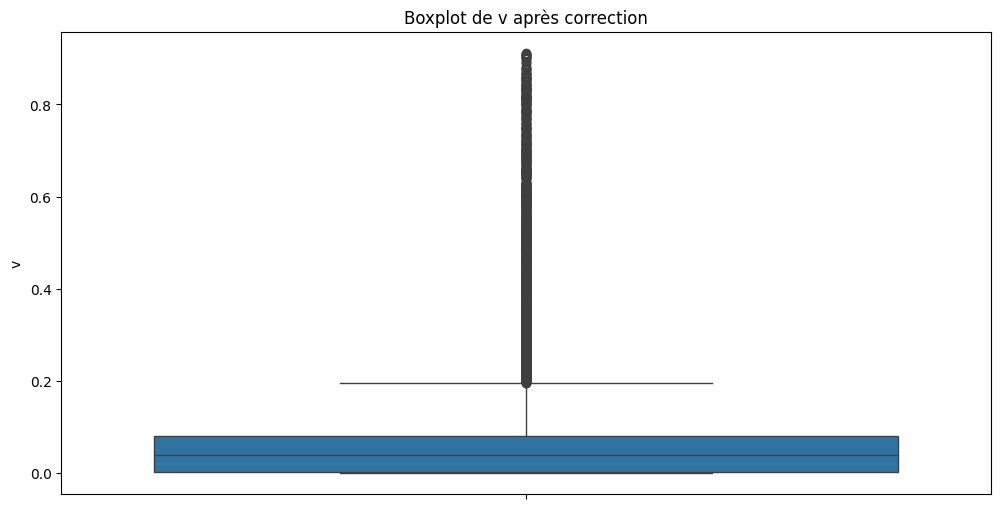

In [12]:
for column in num_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(y=data[column])
    plt.title(f"Boxplot de {column} après correction")
    plt.show()

# Data Manipulation and addition of new variables:
##  Data Transformation  
We enrich the dataset with new variables based on **logarithmic transformations, moving averages, and volatility measures**:

### Computed Variables:  
- **Market Capitalization**: `market = close * volume`
- **Logarithmic Transformations**:  
  - `log_c`, `log_v`, `log_o`, `log_h`, `log_l` → Logarithm of prices and volume  
  - `log_market` → Logarithm of market capitalization  
- **Intraday Volatility**: `volatility = high - low`
- **Rolling Statistics (24-hour window)**:  
  - `rolling_mean_24h` → 24-hour moving average of closing price  
  - `rolling_std_24h` → 24-hour rolling standard deviation of closing price  
- **Spread**: `(high - low) / close`  
- **Logarithmic Return**: `log_return = log(close / close.shift(1))`  

In [22]:
data['market'] = data['c'] * data['v']
# close -> log_close
data['log_c'] = np.log(data.c)
# volume -> log_volume
data['log_v'] = np.log(data.v)
data['log_o'] = np.log(data.o)
data['log_h'] = np.log(data.h)
data['log_l'] = np.log(data.l)
data['volatilite'] = data['h'] - data['l']
# market -> log_market
#crypto['log_market'] = np.log(crypto.market)
data['log_market'] = np.log(data.market)
data['rolling_mean_24h'] = data['c'].rolling(window=24, min_periods=1).mean()
data['rolling_std_24h'] = data['c'].rolling(window=24, min_periods=1).std()

# Spread
data['spread'] = (data.h - data.l) / data.c
# return -> log (close / open)
data['log_return'] = np.log(data.c / data.c.shift(1))

data.dropna(inplace=True)

/home/habib/miniconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [17]:
data.head(10)

,symbol,t,o,h,l,c,v,vw,n,volatilite,...,log_c,log_v,log_o,log_h,log_l,log_market,rolling_mean_24h,rolling_std_24h,spread,log_return
1,BTC/USD,2024-08-01 01:00:00+00:00,64606.7250,64788.485,64094.840000,64193.8700,0.032612,64575.553126,1.609438,693.645000,...,11.069663,-3.423066,11.076074,11.078883,11.068119,7.646597,64417.157500,315.776211,0.010805,-0.006933
2,BTC/USD,2024-08-01 02:00:00+00:00,64146.8340,64226.950,63860.490000,64091.9340,0.090788,64048.468919,2.302585,366.460000,...,11.068074,-2.399232,11.068930,11.070178,11.064456,8.668841,64308.749667,291.743179,0.005718,-0.001589
3,BTC/USD,2024-08-01 03:00:00+00:00,64058.8100,64096.895,63750.000000,63919.9875,0.012476,63996.530554,1.945910,346.895000,...,11.065387,-4.383946,11.067557,11.068151,11.062724,6.681441,64211.559125,307.451992,0.005427,-0.002686
4,BTC/USD,2024-08-01 04:00:00+00:00,63888.6500,64016.395,63638.964392,63675.1270,0.037103,63850.300155,1.945910,377.430608,...,11.061549,-3.294065,11.064897,11.066895,11.060981,7.767484,64104.272700,358.394936,0.005927,-0.003838
5,BTC/USD,2024-08-01 05:00:00+00:00,63683.7000,64322.310,63552.852500,64247.4330,0.237002,64204.856099,2.197225,769.457500,...,11.070497,-1.439685,11.061684,11.071662,11.059627,9.630812,64128.132750,325.842533,0.011976,0.008948
6,BTC/USD,2024-08-01 06:00:00+00:00,64220.0450,64406.557,64077.674000,64214.7220,0.523534,64082.471362,1.386294,328.883000,...,11.069988,-0.647153,11.070071,11.072971,11.067851,10.422834,64140.502643,299.247217,0.005122,-0.000509
7,BTC/USD,2024-08-01 07:00:00+00:00,64234.4750,64440.394,64207.657500,64302.2495,0.075768,64353.883272,1.386294,232.736500,...,11.071350,-2.580079,11.070295,11.073496,11.069878,8.491271,64160.721000,282.889471,0.003619,0.001362
8,BTC/USD,2024-08-01 08:00:00+00:00,64341.6550,64514.410,64307.520000,64477.5050,0.010890,64484.856553,1.791759,206.890000,...,11.074072,-4.519949,11.071963,11.074644,11.071432,6.554122,64195.919222,284.909424,0.003209,0.002722
9,BTC/USD,2024-08-01 09:00:00+00:00,64467.7740,64638.600,64427.350000,64448.7860,0.038523,64476.238937,2.197225,211.250000,...,11.073626,-3.256498,11.073921,11.076567,11.073294,7.817128,64221.205900,280.264654,0.003278,-0.000446
10,BTC/USD,2024-08-01 10:00:00+00:00,64431.0295,64561.292,64289.705000,64555.6450,0.015383,64404.736064,1.609438,271.587000,...,11.075283,-4.174506,11.073351,11.075370,11.071155,6.900777,64251.609455,284.361717,0.004207,0.001657


# Data Visualization


## 1. BTC/USD Volatility Over Time  


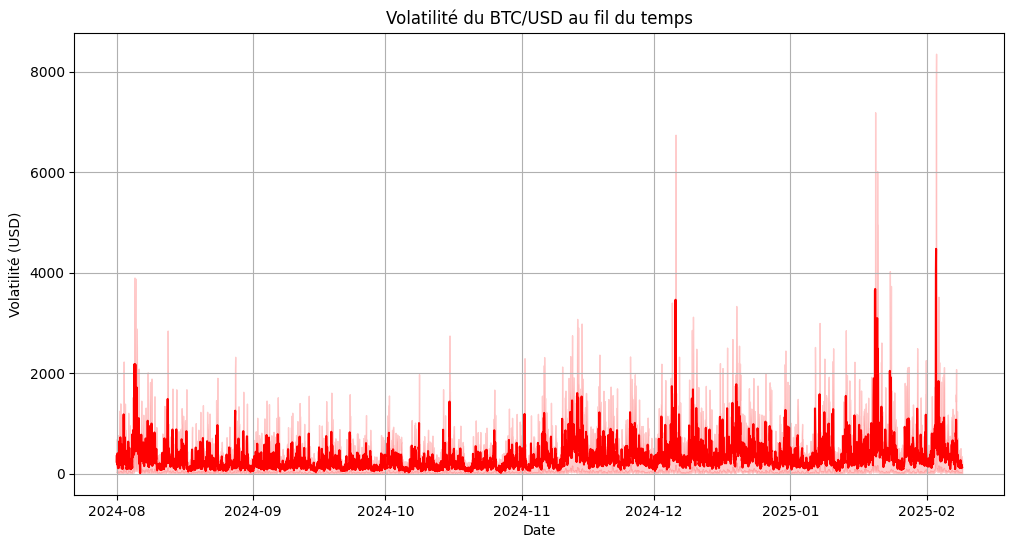

In [13]:
data['volatilite'] = data['h'] - data['l']

plt.figure(figsize=(12, 6))
sns.lineplot(x=data['t'], y=data['volatilite'], color='red')
plt.xlabel("Date")
plt.ylabel("Volatilité (USD)")
plt.title("Volatilité du BTC/USD au fil du temps")
plt.grid()
plt.show()

## 2. Number of Transactions Over Time


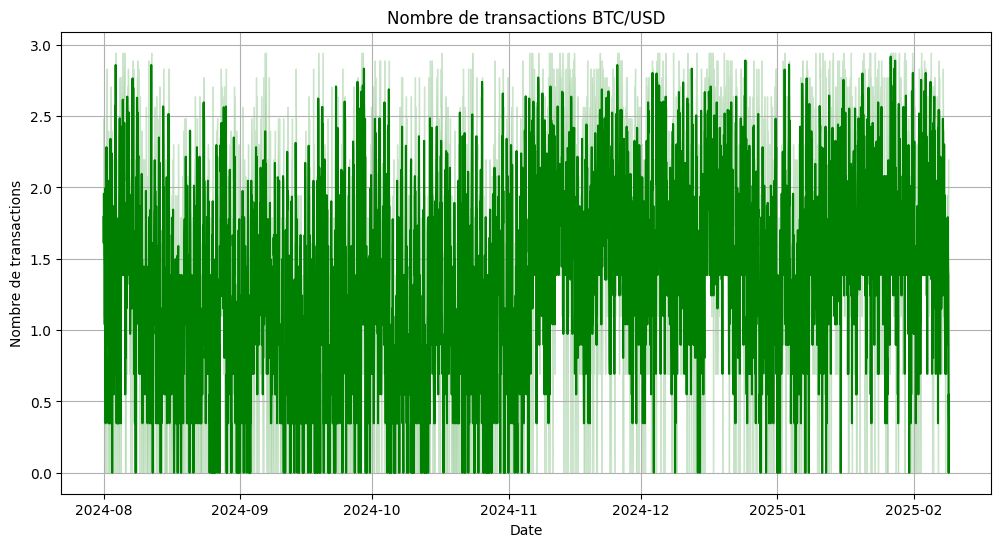

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=data['t'], y=data['n'], color='green')
plt.xlabel("Date")
plt.ylabel("Nombre de transactions")
plt.title("Nombre de transactions BTC/USD")
plt.grid()
plt.show()

## 3. Market Capitalization Distribution by Symbol



Text(0.5, 1.0, 'distrubution of symbol in market')

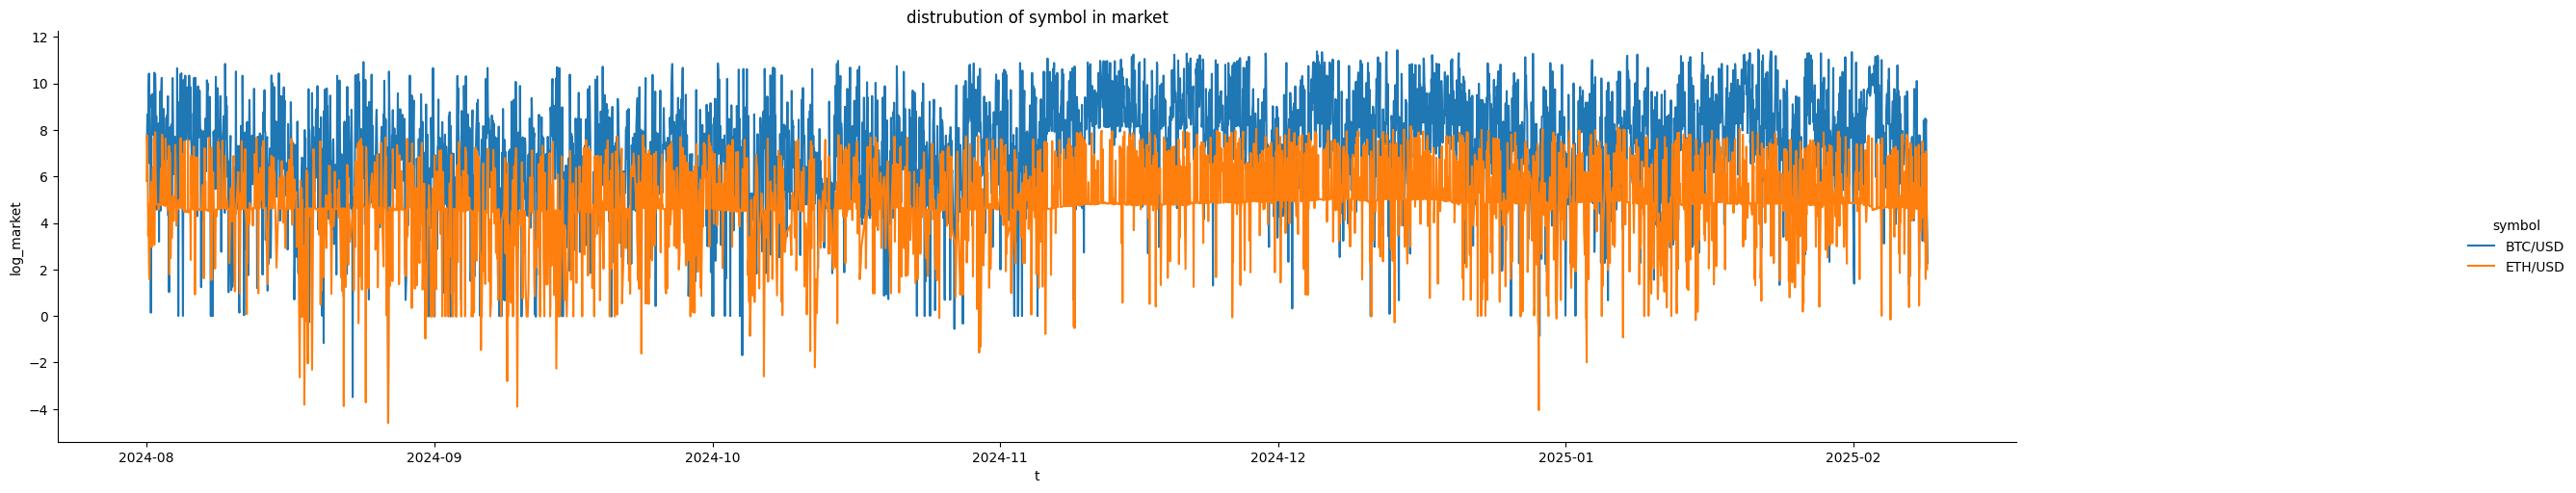

In [18]:
g = sns.relplot(x = 't', y = 'log_market', kind = 'line', data = data, hue = 'symbol')
g.fig.set_figwidth(30)
g.ax.set_title("distrubution of symbol in market")

## 4. Symbol Distribution in the Dataset
 


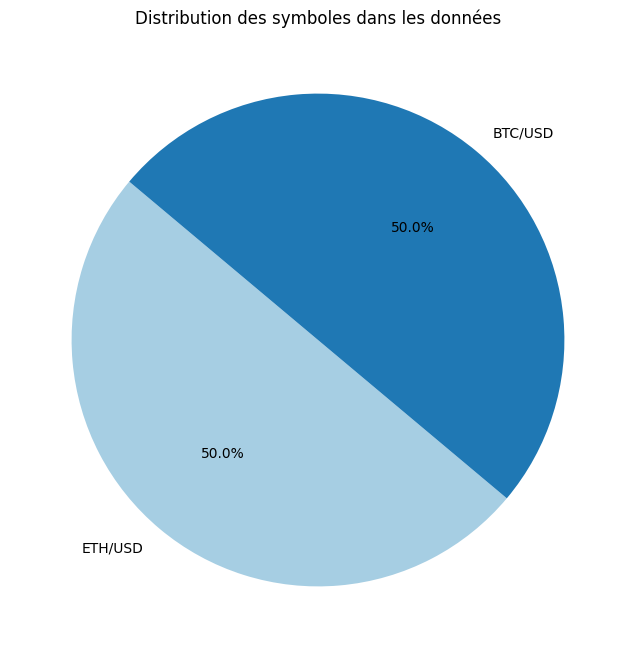

In [19]:
symbol_counts = data['symbol'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(symbol_counts, labels=symbol_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Distribution des symboles dans les données")
plt.show()